# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print( output_data_file)

output_data/cities.csv


## Generate Cities List

In [34]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print (len(cities))
print (cities[0:10])

597
['nanortalik', 'sorvag', 'kavieng', 'hobart', 'cheremshanka', 'pevek', 'atuona', 'attawapiskat', 'young', 'qaanaaq']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "bengkulu"
units = "metric"

query_url = f"{url}appid={api_key}&q={city}&units={units}"

# city_weather = requests.get(query_url)
# city_weather_json = city_weather.json()
# print(json.dumps(city_weather_json,indent = 4))

print ("Beginning Data Retrieval")
print ("--------------------------------")
record = 0
Set = 1
weather_data = []

for city in cities:
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    city_weather = requests.get(query_url)
    city_weather_json = city_weather.json()
    record += 1
    print(f"Processing Record {record} of Set {Set} | {city}")
        
        
        
    if record == 50:
            Set += 1
            record = 1
    if "city not found" not in city_weather_json.values():
        weather_data.append(city_weather_json)
    else:
        print("City not found. Skipping...")
        
print ("--------------------------------")
print ("Data Retrieving Complete")
print ("--------------------------------")

Beginning Data Retrieval
--------------------------------
Processing Record 1 of Set 1 | nanortalik
Processing Record 2 of Set 1 | sorvag
City not found. Skipping...
Processing Record 3 of Set 1 | kavieng
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | cheremshanka
Processing Record 6 of Set 1 | pevek
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 9 of Set 1 | young
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | airai
Processing Record 13 of Set 1 | chuy
Processing Record 14 of Set 1 | diego de almagro
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | qinhuangdao
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | mayumba
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | castro
Processing Record 22 of S

Processing Record 36 of Set 4 | iqaluit
Processing Record 37 of Set 4 | udachnyy
Processing Record 38 of Set 4 | fougamou
Processing Record 39 of Set 4 | yatou
Processing Record 40 of Set 4 | mount gambier
Processing Record 41 of Set 4 | thompson
Processing Record 42 of Set 4 | barawe
City not found. Skipping...
Processing Record 43 of Set 4 | katsuura
Processing Record 44 of Set 4 | ondjiva
Processing Record 45 of Set 4 | los llanos de aridane
Processing Record 46 of Set 4 | anadyr
Processing Record 47 of Set 4 | provideniya
Processing Record 48 of Set 4 | coffeyville
Processing Record 49 of Set 4 | kopervik
Processing Record 50 of Set 4 | san cristobal
Processing Record 2 of Set 5 | saint-philippe
Processing Record 3 of Set 5 | kedougou
Processing Record 4 of Set 5 | north bend
Processing Record 5 of Set 5 | hashtrud
Processing Record 6 of Set 5 | berlevag
Processing Record 7 of Set 5 | nikolayevsk-na-amure
Processing Record 8 of Set 5 | walvis bay
Processing Record 9 of Set 5 | ospi

Processing Record 22 of Set 8 | kushima
Processing Record 23 of Set 8 | creel
Processing Record 24 of Set 8 | maryborough
Processing Record 25 of Set 8 | sioux lookout
Processing Record 26 of Set 8 | kisangani
Processing Record 27 of Set 8 | raudeberg
Processing Record 28 of Set 8 | noshiro
Processing Record 29 of Set 8 | trelew
Processing Record 30 of Set 8 | moron
Processing Record 31 of Set 8 | vestmannaeyjar
Processing Record 32 of Set 8 | talnakh
Processing Record 33 of Set 8 | vitim
Processing Record 34 of Set 8 | whitecourt
Processing Record 35 of Set 8 | agirish
Processing Record 36 of Set 8 | kutum
Processing Record 37 of Set 8 | mogadishu
Processing Record 38 of Set 8 | santa marta
Processing Record 39 of Set 8 | haimen
Processing Record 40 of Set 8 | sarangani
Processing Record 41 of Set 8 | kuche
City not found. Skipping...
Processing Record 42 of Set 8 | bacolod
Processing Record 43 of Set 8 | batagay-alyta
Processing Record 44 of Set 8 | asayita
City not found. Skipping..

Processing Record 14 of Set 12 | tatawin
City not found. Skipping...
Processing Record 15 of Set 12 | chenzhou
Processing Record 16 of Set 12 | arlit
Processing Record 17 of Set 12 | lahij
Processing Record 18 of Set 12 | katobu
Processing Record 19 of Set 12 | wattegama
Processing Record 20 of Set 12 | avera
Processing Record 21 of Set 12 | tadine
Processing Record 22 of Set 12 | jackson
Processing Record 23 of Set 12 | luau
Processing Record 24 of Set 12 | lasa
Processing Record 25 of Set 12 | mackay
Processing Record 26 of Set 12 | karaul
City not found. Skipping...
Processing Record 27 of Set 12 | macaboboni
City not found. Skipping...
Processing Record 28 of Set 12 | trairi
Processing Record 29 of Set 12 | necochea
Processing Record 30 of Set 12 | galich
Processing Record 31 of Set 12 | port hardy
Processing Record 32 of Set 12 | camana
City not found. Skipping...
Processing Record 33 of Set 12 | khani
Processing Record 34 of Set 12 | mastic beach
Processing Record 35 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
all_keys = set().union(*(d.keys() for d in weather_data))
print (all_keys)
with open(output_data_file, 'w',newline = '') as output_file:
    dict_writer = csv.DictWriter(output_file, all_keys)
    dict_writer.writeheader()

    dict_writer.writerows(weather_data)

{'id', 'rain', 'visibility', 'main', 'sys', 'weather', 'cod', 'wind', 'base', 'clouds', 'coord', 'name', 'dt', 'snow'}


In [42]:
weather_df = pd.DataFrame()
index = 0
for city in weather_data:
    
    name = city["name"]
    cloudiness = city["clouds"]["all"]
    country = city["sys"]["country"]
    date = city["dt"]
    humidity = city["main"]["humidity"]
    lat = city["coord"]["lat"]
    lon = city["coord"]["lon"]
    max_temp = city["main"]["temp_max"]
    wind_speed = city["wind"]["speed"]

    weather_dict = {
        "City" : name,
        "Cloudiness" : cloudiness,
        "Country" : country,
        "Date" : date,
        "Humidity" : humidity,
        "Lat" : lat,
        "Lng" : lon,
        "Max Temp": max_temp,
        "Wind Speed" : wind_speed
    }
    weather_city_data = pd.DataFrame(weather_dict, index = [index])
    weather_df = weather_df.append(weather_city_data)
    index += 1
    
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nanortalik,0,GL,1551199934,100,60.14,-45.24,0.73,2.14
1,Kavieng,64,PG,1551199935,100,-2.57,150.80,27.25,3.86
2,Hobart,0,AU,1551199876,81,-42.88,147.33,9.00,3.60
3,Cheremshanka,88,UA,1551199935,76,51.44,24.50,3.78,7.29
4,Pevek,64,RU,1551199935,69,69.70,170.27,-18.80,0.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

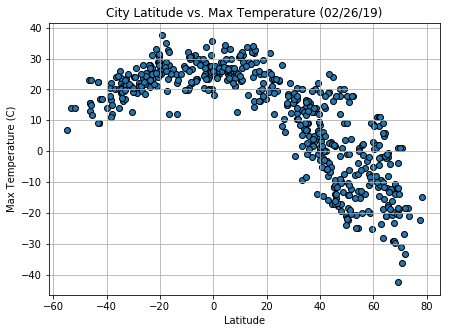

In [43]:
fig, lat_temp = plt.subplots(figsize = (7,5))

lat_temp.scatter(weather_df["Lat"],weather_df["Max Temp"], edgecolors = "black")

plt.title("City Latitude vs. Max Temperature (02/26/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# plt.xlim(-90,90)
# plt.ylim(-50,105)

lat_temp.grid()

plt.show()

#### Latitude vs. Humidity Plot

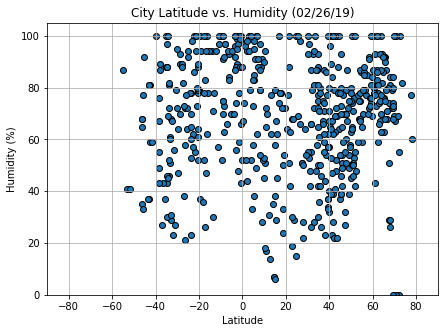

In [49]:
fig, lat_hum = plt.subplots(figsize = (7,5))

lat_hum.scatter(weather_df["Lat"],weather_df["Humidity"], edgecolors = "black")

plt.title("City Latitude vs. Humidity (02/26/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.xlim(-90,90)
plt.ylim(0,105)

lat_hum.grid()

plt.savefig("output_data/Latitude_vs_Humidity")
plt.show()

#### Latitude vs. Cloudiness Plot

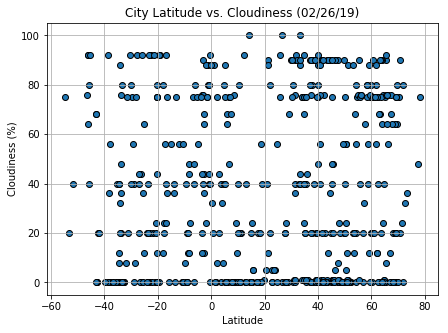

In [48]:
fig, lat_hum = plt.subplots(figsize = (7,5))

lat_hum.scatter(weather_df["Lat"],weather_df["Cloudiness"], edgecolors = "black")

plt.title("City Latitude vs. Cloudiness (02/26/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# plt.xlim(-90,90)
# plt.ylim(0,105)

lat_hum.grid()


plt.savefig("output_data/Latitude_vs_Cloudiness")
plt.show()

#### Latitude vs. Wind Speed Plot

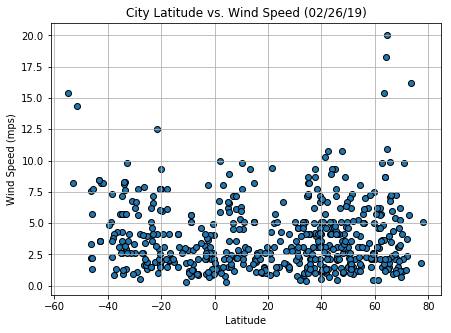

In [47]:
fig, lat_hum = plt.subplots(figsize = (7,5))

lat_hum.scatter(weather_df["Lat"],weather_df["Wind Speed"], edgecolors = "black")

plt.title("City Latitude vs. Wind Speed (02/26/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mps)")

# plt.xlim(-90,90)
# plt.ylim(0,105)

lat_hum.grid()

plt.savefig("output_data/Latitude_vs_Wind_Speed")
plt.show()

Observations!
1. There seems to be Cloudiness levels that are more stable across latitudes than others. (20% ,40% ...)
2. The planet is a very humid place no matter the latitude, very few cities have low humidity.
3. Temperature tends to increase as latitude approaches the equator but it does not necessarily mean that the temperature will be consistent amonng longitudes.